In [ ]:
import csv
from datetime import datetime
from statistics import median
import matplotlib

In [372]:

path ="legosets.csv"

#check if there are any duplicate rows
content=open(path,'r').readlines()
content_set=set(content)                 # using set constructor,as set objects ignores any duplicate value
#print(len(content_set), len(content))   #length of content==content_set, hence no duplicates, no cleaning required

with open(path, newline='') as file:  
    csv_reader = csv.reader(file)  # parse csv data from the file
    header = next(csv_reader)      # read first line as header
    data = []                      # remaining data will be stored in this list
    lego_dict={}                   # final output dictionary giving all_pieces,year_most,average_pieces,most_used_word
    set_per_yr = {}                # will store pairs of {year:total number of sets relased in that year}
    total_lego_pc = 0              # will count total number of lego pieces in all sets released
    max_by_year = 0
    year_most = 0
    total_rows = 0
    name_list=[]
    num_pc_yr = []
    
    for row in csv_reader:
        #row = ['set_num', 'name', 'year', 'theme_id', 'num_parts']
        set_num = row[0]
        name = row[1]
        year = int(row[2])
        theme_id = row[3]
        num_parts = int(row[4])                  
        data.append([set_num,name,year,theme_id,num_parts])
        #------- code to get 'most_used_word'----------------
        name = name.replace(' - ', ' ').title()  #remove ' - ' from name,so that it is not counted as seperate word
        name_list += name.strip().split()        #split name into seperate words
        
        #-------- code to get 'all_pieces'----------------
        total_lego_pc += num_parts               
        
        #-------- code to get 'year_most' and 'median number of pieces by year'----------------
        #set_per_yr[year] = set_per_yr.get(year, 0)  + 1  #if key for the year doesn't exist, create with default 0,increment
        #if set_per_yr[year] > max_by_year:
        #    max_by_year, year_most = set_per_yr[year], year
            
            
            
        #---    
        set_per_yr[year] = set_per_yr.get(year,{"set_per_yr": 0, "num_pc_yr":[]})
        set_per_yr[year]["set_per_yr"] = set_per_yr[year]["set_per_yr"] +1
        set_per_yr[year]["num_pc_yr"].append(num_parts)
        if set_per_yr[year]["set_per_yr"] > max_by_year:
            max_by_year, year_most = set_per_yr[year]["set_per_yr"], year
        #---sort by year
        

    #--------prepare list of 'year of release' and and 'median number of piece'----
    x_year = []
    y_median = []
    for item in set_per_yr:
        x_year.append(item)
        y_median.append(statistics.median(set_per_yr[item]["num_pc_yr"]))


 
    lego_dict['all_pieces'] = total_lego_pc    
    lego_dict['year_most'] = year_most
    lego_dict['average_pieces'] = round(total_lego_pc/len(data),1)
    lego_dict['most_used_word'] = mode(name_list)            #max(set(name_list), key = name_list.count)-same result but more processing time
    print(lego_dict)
    #print(set_per_yr)
    #print('year_most : ' + str(year_most) + " with sets : " + str(max_by_year))
    #print(set_per_yr[2014], set_per_yr[1950], set_per_yr[2016], set_per_yr[2017])

      
# 'all_pieces': If you had one of each of the sets, how many pieces of Lego would you have then?
# 'year_most': In which year was the highest number of sets released?
# 'average_pieces': What is the average number of pieces in all sets, rounded to 1 decimal?
# 'most_used_word': Which word is used most often in the names of the sets?


{'all_pieces': 1894089, 'year_most': 2014, 'average_pieces': 162.3, 'most_used_word': 'Set'}


In [ ]:
- #Plot the years from 1950-2017 on the x-axis and the median number of pieces of a set of the given year on the y-axis

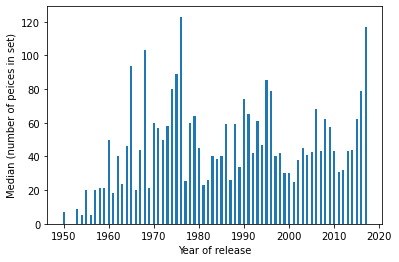

In [369]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array(x_year)
y = np.array(y_median)

plt.bar(x, y,width = 0.5)

plt.xlabel("Year of release")
plt.ylabel("Median (number of peices in set)")

plt.show()